# 6. [Probability 機率](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/probability.py)
https://github.com/joelgrus/data-science-from-scratch  
https://en.wikipedia.org/wiki/Bayes%27_theorem   
https://en.wikipedia.org/wiki/File:Bayes%27_Theorem_2D.svg  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division
from collections import Counter
import math, random

def random_kid():
    return random.choice(["boy", "girl"])

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()      

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2  

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()



if __name__ == "__main__":

    #
    # CONDITIONAL PROBABILITY
    #

    both_girls = 0
    older_girl = 0
    either_girl = 0

    random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == "girl":
            older_girl += 1
        if older == "girl" and younger == "girl":
            both_girls += 1
        if older == "girl" or younger == "girl":
            either_girl += 1

    print("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2
    print("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


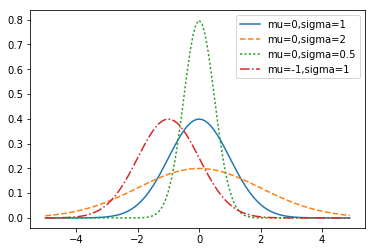

In [3]:
plot_normal_pdfs(plt)

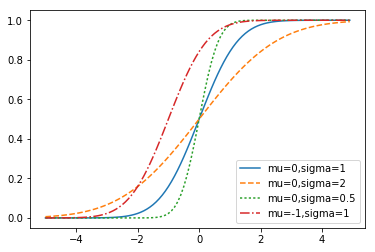

In [4]:
plot_normal_cdfs(plt)

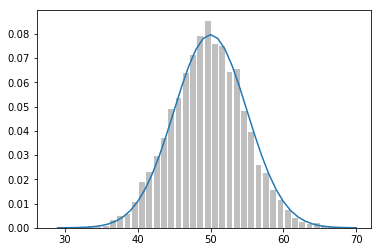

In [12]:
make_hist(0.5, 100, 10000)